In [8]:
import json
import glob
import numpy as np
import cv2
import copy
import os

In [1]:
import matplotlib.pyplot as plt

cap = cv2.VideoCapture(r'train dataset\aapnvogymq.mp4')

In [9]:
video_files =  glob.glob('train_dataset/*.mp4')
frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<150):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames" , frame_count)
print("Total number of videos: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

frames []
Total number of videos:  0
Average frame per video: nan


c:\Users\Suyash Tambe\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Suyash Tambe\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
# def frame_extract(path):
#       vidObj = cv2.VideoCapture(path) 
#   success = 1
#   while success:
#       success, image = vidObj.read()
#       if success:
#           yield image
# !pip3 install face_recognition
# !mkdir '/content/drive/My Drive/FF_REAL_Face_only_data'
# import torch
# import torchvision
# from torchvision import transforms
# from torch.utils.data import DataLoader
# from torch.utils.data.dataset import Dataset
# import os
# import numpy as np
# import cv2
# import matplotlib.pyplot as plt
# import face_recognition
# from tqdm.autonotebook import tqdm
# # process the frames
# def create_face_videos(path_list,out_dir):
#   already_present_count =  glob.glob(out_dir+'*.mp4')
#   print("No of videos already present " , len(already_present_count))
#   for path in tqdm(path_list):
#     out_path = os.path.join(out_dir,path.split('/')[-1])
#     file_exists = glob.glob(out_path)
#     if(len(file_exists) != 0):
#       print("File Already exists: " , out_path)
#       continue
#     frames = []
#     flag = 0
#     face_all = []
#     frames1 = []
#     out = cv2.VideoWriter(out_path,cv2.VideoWriter_fourcc('M','J','P','G'), 30, (112,112))
#     for idx,frame in enumerate(frame_extract(path)):
#       #if(idx % 3 == 0):
#       if(idx <= 150):
#         frames.append(frame)
#         if(len(frames) == 4):
#           faces = face_recognition.batch_face_locations(frames)
#           for i,face in enumerate(faces):
#             if(len(face) != 0):
#               top,right,bottom,left = face[0]
#             try:
#               out.write(cv2.resize(frames[i][top:bottom,left:right,:],(112,112)))
#             except:
#               pass
#           frames = []
#     try:
#       del top,right,bottom,left
#     except:
#       pass
#     out.release()
     


In [12]:
DATA_PATH = '/train_dataset'

In [3]:
import cv2

video_path = r'train dataset\aapnvogymq.mp4'
cap = cv2.VideoCapture(video_path)


if not cap.isOpened():
    print("Error: Could not open video.")
else:
    
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))


    if fps == 0:
        print("Warning: FPS is zero. Using default FPS of 30.")
        fps = 30  

  
    duration = frame_count / fps
    print(f"Video FPS: {fps}, Total frames: {frame_count}, Duration: {duration:.2f} seconds")


Video FPS: 29.97, Total frames: 300, Duration: 10.01 seconds


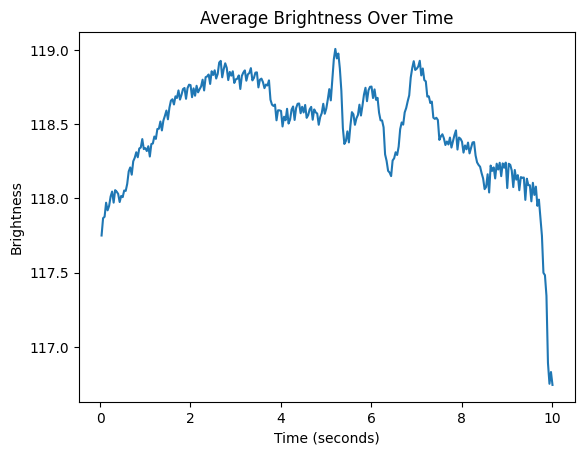

In [4]:
import numpy as np
import matplotlib.pyplot as plt

brightness = []
timestamps = []

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
   
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
   
    avg_brightness = np.mean(gray_frame)
    brightness.append(avg_brightness)

   
    current_frame = len(brightness)
    timestamp = current_frame / fps
    timestamps.append(timestamp)

cap.release()


plt.plot(timestamps, brightness)
plt.title('Average Brightness Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Brightness')
plt.show()


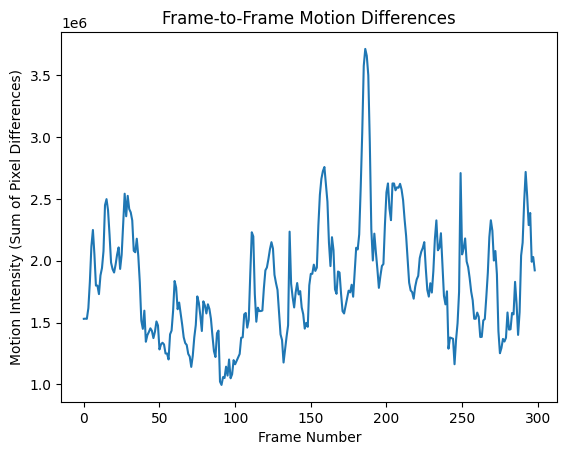

In [5]:

cap = cv2.VideoCapture(video_path)

motion_diffs = []

previous_frame = None

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
  
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    if previous_frame is not None:
        
        frame_diff = cv2.absdiff(gray_frame, previous_frame)
        
        diff_sum = np.sum(frame_diff)
        motion_diffs.append(diff_sum)
    

    previous_frame = gray_frame

cap.release()


plt.plot(motion_diffs)
plt.title('Frame-to-Frame Motion Differences')
plt.xlabel('Frame Number')
plt.ylabel('Motion Intensity (Sum of Pixel Differences)')
plt.show()


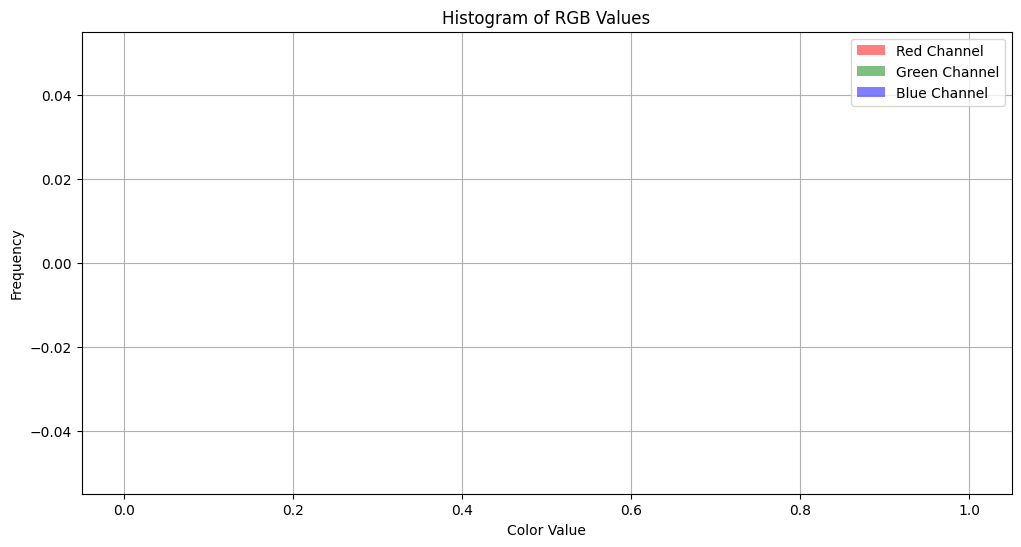

In [12]:


r_vals = []
g_vals = []
b_vals = []

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    r_vals.extend(rgb_frame[:, :, 0].ravel())
    g_vals.extend(rgb_frame[:, :, 1].ravel())
    b_vals.extend(rgb_frame[:, :, 2].ravel())

cap.release()

# Plot histograms
plt.figure(figsize=(12, 6))
plt.hist(r_vals, bins=256, color='red', alpha=0.5, label='Red Channel')
plt.hist(g_vals, bins=256, color='green', alpha=0.5, label='Green Channel')
plt.hist(b_vals, bins=256, color='blue', alpha=0.5, label='Blue Channel')
plt.title('Histogram of RGB Values')
plt.xlabel('Color Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)  # Optional: add grid for better readability
plt.show()


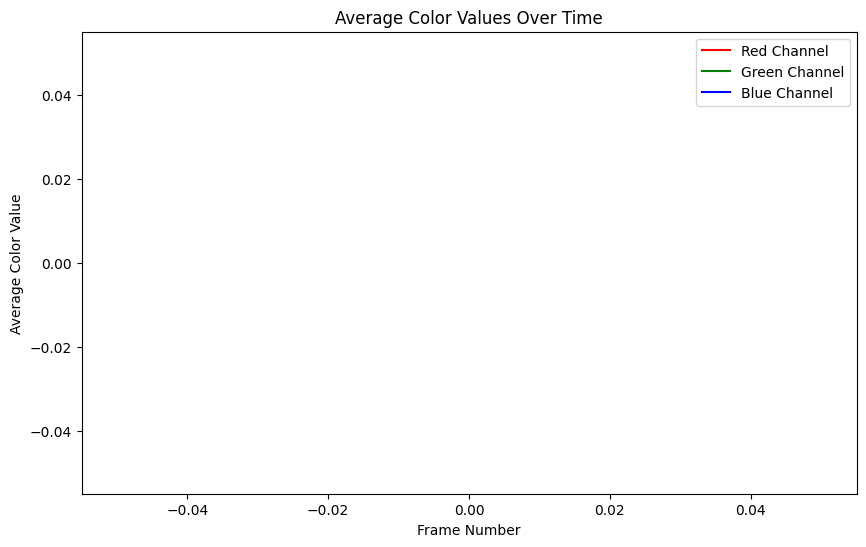

In [7]:


r_vals, g_vals, b_vals = [], [], []

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Convert the frame to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Calculate average color
    avg_color = np.mean(rgb_frame, axis=(0, 1))
    r_vals.append(avg_color[0])
    g_vals.append(avg_color[1])
    b_vals.append(avg_color[2])

cap.release()

plt.figure(figsize=(10, 6))
plt.plot(r_vals, color='red', label='Red Channel')
plt.plot(g_vals, color='green', label='Green Channel')
plt.plot(b_vals, color='blue', label='Blue Channel')
plt.title('Average Color Values Over Time')
plt.xlabel('Frame Number')
plt.ylabel('Average Color Value')
plt.legend()
plt.show()


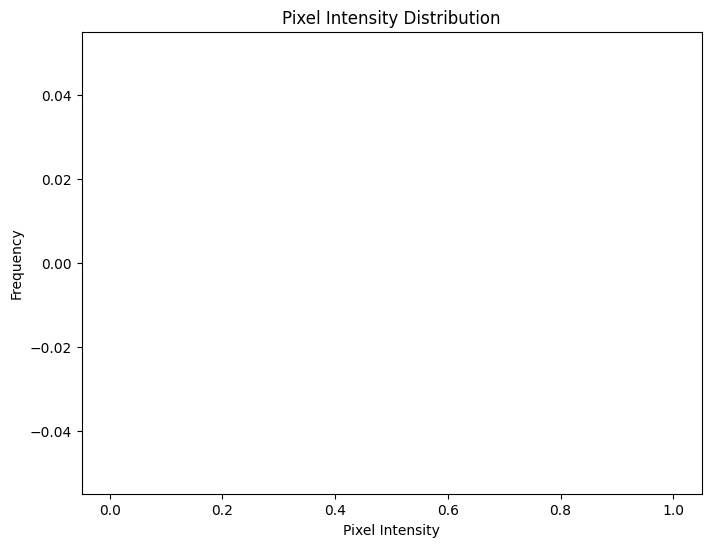

In [10]:
intensities = []

while True:
    ret, frame = cap.read()
    if not ret:
        break
 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    intensities.extend(gray.ravel())

cap.release()


plt.figure(figsize=(8, 6))
plt.hist(intensities, bins=256, color='gray', alpha=0.75)
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()